# Exploratory Data Analysis Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import csv data
df = pd.read_csv('match_data.csv')
df.columns = ['player_id', 'time_s', 'x', 'y', 'speed_mps']
df.head()

,player_id,time_s,x,y,speed_mps
0,455426a2-5604-4c3a-8b89-ed0519f8d77a,0.0,-18.977667,-38.511021,0.060
1,685d721f-fb27-4fb6-a327-6c8b420bf47f,0.0,-18.740459,-37.195089,0.039
2,8d6885e6-bfa9-4561-820c-f80eac8d7f62,0.0,-14.467439,-38.767767,0.036
3,455426a2-5604-4c3a-8b89-ed0519f8d77a,0.1,-18.977667,-38.511021,0.071
4,685d721f-fb27-4fb6-a327-6c8b420bf47f,0.1,-18.737733,-37.179963,0.019


In [4]:
df.info()  # No null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985274 entries, 0 to 985273
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   player_id  985274 non-null  object 
 1   time_s     985274 non-null  float64
 2   x          985274 non-null  float64
 3   y          985274 non-null  float64
 4   speed_mps  985274 non-null  float64
dtypes: float64(4), object(1)
memory usage: 37.6+ MB


In [7]:
df.time_s.describe() # time values from 0.0s to 6597.0s increasing at every 0.1s interval
df.time_s.nunique()

65971

In [10]:
df.player_id.nunique()  # 17 players including 'ball'
df.player_id.unique()

df.player_id.value_counts()  # All except 1 player have missing data for certain times

player_id
455426a2-5604-4c3a-8b89-ed0519f8d77a    65971
ball                                    65232
bff73444-2e99-46e8-9bef-3a0cece74bab    64576
8d6885e6-bfa9-4561-820c-f80eac8d7f62    64272
685d721f-fb27-4fb6-a327-6c8b420bf47f    63962
b2d99dc2-6919-4c70-b381-6f89ca52048d    63935
33d4053e-34a9-4324-97a5-c17e8607d4c9    59852
a7cc7c2e-350d-47a3-9d76-e40bc7cffa9e    57684
b4498a98-9d30-4f18-8cdf-884774505d34    57621
a04c9fce-b4f1-4f7f-82be-ed9e8f21feb8    57442
019d8fa9-3cbd-42f2-bfcf-1bc676d13e0f    57395
d56ca4de-1be4-499a-8242-b219e051f33c    57304
0c7c551a-93df-416d-a892-81eccd50c6eb    56082
320d9832-0fdf-400e-b4e1-0d2b56144cf9    52860
48e50e40-2bc0-4a20-93cf-4683bcd13bf7    47967
5f9839df-d91a-4ecd-b446-795329b174a5    47015
3b7ea68d-8174-4061-94cc-84a07d488cfe    46104
Name: count, dtype: int64

In [15]:
df.x.describe()  # x values from -86.95 to 122.89
df.y.describe()  # y values from -51.19 to 158.13

df_pitch = df[(df.x < 52.5) & (df.x > -52.5) & (df.y < 34) & (df.y > -34)]   # 629,254 data points within valid pitch range
df_pitch.player_id.value_counts()    # number of data points for each player reduces significantly when we restrict to pitch range

player_id
ball                                    58392
d56ca4de-1be4-499a-8242-b219e051f33c    56852
019d8fa9-3cbd-42f2-bfcf-1bc676d13e0f    54297
0c7c551a-93df-416d-a892-81eccd50c6eb    53712
a7cc7c2e-350d-47a3-9d76-e40bc7cffa9e    52935
b4498a98-9d30-4f18-8cdf-884774505d34    52782
a04c9fce-b4f1-4f7f-82be-ed9e8f21feb8    52577
48e50e40-2bc0-4a20-93cf-4683bcd13bf7    46238
320d9832-0fdf-400e-b4e1-0d2b56144cf9    38359
3b7ea68d-8174-4061-94cc-84a07d488cfe    36319
5f9839df-d91a-4ecd-b446-795329b174a5    35075
bff73444-2e99-46e8-9bef-3a0cece74bab    26380
33d4053e-34a9-4324-97a5-c17e8607d4c9    21048
685d721f-fb27-4fb6-a327-6c8b420bf47f    16632
455426a2-5604-4c3a-8b89-ed0519f8d77a    12634
b2d99dc2-6919-4c70-b381-6f89ca52048d     8330
8d6885e6-bfa9-4561-820c-f80eac8d7f62     6692
Name: count, dtype: int64

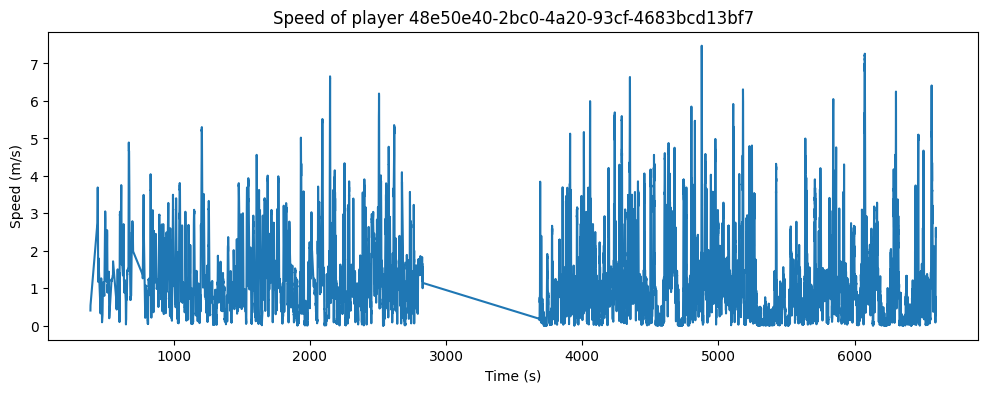

In [59]:
df.speed_mps.describe()
df.groupby('player_id', as_index=False).aggregate({'speed_mps':['max','min']})  # max player speed is 8.2 mps - this is reasonable

# Plot player speed data
def speed_plot(player_id : str, df : pd.DataFrame) -> None:
    """Plot the players speed throughout the recorded data"""

    df_player = df[df.player_id == player_id]

    fig = plt.figure(figsize=(12,4))
    plt.plot(df_player['time_s'], df_player['speed_mps'])
    plt.xlabel('Time (s)')
    plt.ylabel('Speed (m/s)')
    plt.title(f"Speed of player {player_id}")

    plt.show()

playerID = df.player_id.unique()[16]
speed_plot(playerID, df)

### Key TakeAways From EDA:

1. There are 17 unique participants being tracked - 16 players, 1 ball

2. There are no null data entries, BUT many players have no recorded data for certain time points - this is likely due to the tracking device being turned off

3. There is data recorded at each 0.1s interval from 0.0s to 6597.0s

4. When we filter data from outside the valid pitch range the number of data points falls from 985,274 to 629.254

5. After looking at the speed plots there seem to be no outliers in the speed data - As such when filtering the speed data we will only apply a 0.3s window moving average filter as this will reduce noise in the speed data, and will not be negatively skewed by anomalous speed data. The short window also preserves the frequent spikes and dips in player speed which are inherent in a sports game.

6. The ball speed is 0 for all data points after 1718s thus we will remove these data points from the dataset